## Max Shared Memory Without Cuda Events - All Samples

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----- Load the data -----
dataPath = '../Data/saxpyData/maxTests/'

# First experiment
no_shared1 = pd.read_csv(dataPath+'maxTests1.csv')
shared1 = pd.read_csv(dataPath+'maxTestsShared1.csv')

# rename cols
no_shared1.columns = ['start', 'end']
shared1.columns = ['start', 'end']

# interval column
no_shared1['interval'] = no_shared1['end'] - no_shared1['start']
shared1['interval'] = shared1['end'] - shared1['start']

# Second experiment
no_shared2 = pd.read_csv(dataPath+'maxTests2.csv')
shared2 = pd.read_csv(dataPath+'maxTestsShared2.csv')

# rename cols
no_shared2.columns = ['start', 'end']
shared2.columns = ['start', 'end']

# interval column
no_shared2['interval'] = no_shared2['end'] - no_shared2['start']
shared2['interval'] = shared2['end'] - shared2['start']

# Third experiment
no_shared3 = pd.read_csv(dataPath+'maxTests3.csv')
shared3 = pd.read_csv(dataPath+'maxTestsShared3.csv')

# rename cols
no_shared3.columns = ['start', 'end']
shared3.columns = ['start', 'end']

# interval column
no_shared3['interval'] = no_shared3['end'] - no_shared3['start']
shared3['interval'] = shared3['end'] - shared3['start']


# ----- Accumulate all intervals -----
import numpy as np

# Rescale to microseconds
all_ivls = (no_shared1['interval']/1000).to_list() + (no_shared2['interval']/1000).to_list() + (no_shared3['interval']/1000).to_list()
all_ivls_shared = (shared1['interval']/1000).to_list() + (shared2['interval']/1000).to_list() + (shared3['interval']/1000).to_list()

# ----- Get 5-number distribution summary -----
sum_no_shared =  np.percentile(all_ivls, [0, 25, 50, 75, 100], method='midpoint')

# Print the 5-number summaries
print('No Shared Memory:\n-----------------')
print("Minimum:", sum_no_shared[0])
print("Q1:", sum_no_shared[1])
print("Median:", sum_no_shared[2])
print("Q3:", sum_no_shared[3])
print("Maximum:", sum_no_shared[4])
print('-----------------\n')

print('Shared Memory:\n-----------------')
sum_shared = np.percentile(all_ivls_shared, [0, 25, 50, 75, 100], method='midpoint')
print("Minimum:", sum_shared[0])
print("Q1:", sum_shared[1])
print("Median:", sum_shared[2])
print("Q3:", sum_shared[3])
print("Maximum:", sum_shared[4])
print('-----------------')

No Shared Memory:
-----------------
Minimum: 1014.865
Q1: 1014.874
Median: 1015.892
Q3: 1015.899
Maximum: 5122.504
-----------------

Shared Memory:
-----------------
Minimum: 1005.649
Q1: 1008.722
Median: 1013.842
Q3: 1015.886
Maximum: 5122.442
-----------------


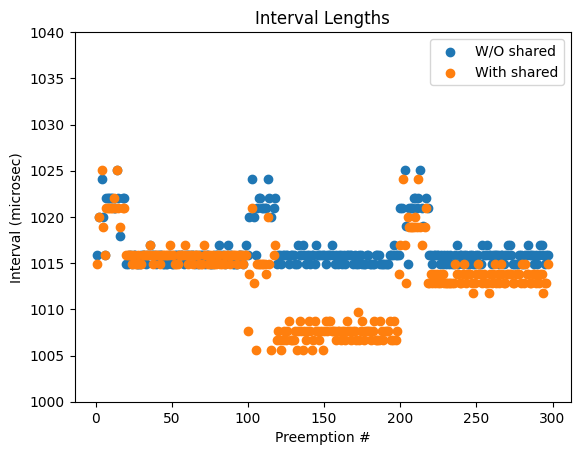

In [8]:

# ----- Plot the data -----
NUM_SAMPLES = 100

# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES*3-2), all_ivls, label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES*3-2), all_ivls_shared, label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (microsec)')
plt.title('Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
plt.ylim(1.0*1e3, 1.04*1e3)

# Show the plot
plt.show()

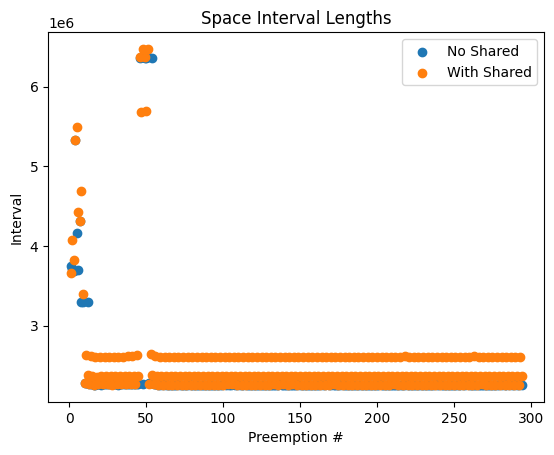

In [9]:
### Other interval version
# Get the interval between the start time and the previous stop time
no_shared_ivls = []
shared_ivls = []
for i in range(0, len(shared1)-1):
  no_shared_ivls.append(no_shared1['end'][i+1] - no_shared1['start'][i])
  shared_ivls.append(shared1['end'][i+1] - shared1['start'][i])
  no_shared_ivls.append(no_shared2['end'][i+1] - no_shared2['start'][i])
  shared_ivls.append(shared2['end'][i+1] - shared2['start'][i])
  no_shared_ivls.append(no_shared3['end'][i+1] - no_shared3['start'][i])
  shared_ivls.append(shared3['end'][i+1] - shared3['start'][i])

# scatterplot of spaced intervals
NUM_SAMPLES = 100

# Create a scatter plot
plt.scatter(range(1, NUM_SAMPLES*3-5), no_shared_ivls, label='No Shared')
plt.scatter(range(1, NUM_SAMPLES*3-5), shared_ivls, label='With Shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval')
plt.title('Space Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
#plt.ylim(1.01*1e6, 1.03*1e6)

# Show the plot
plt.show()

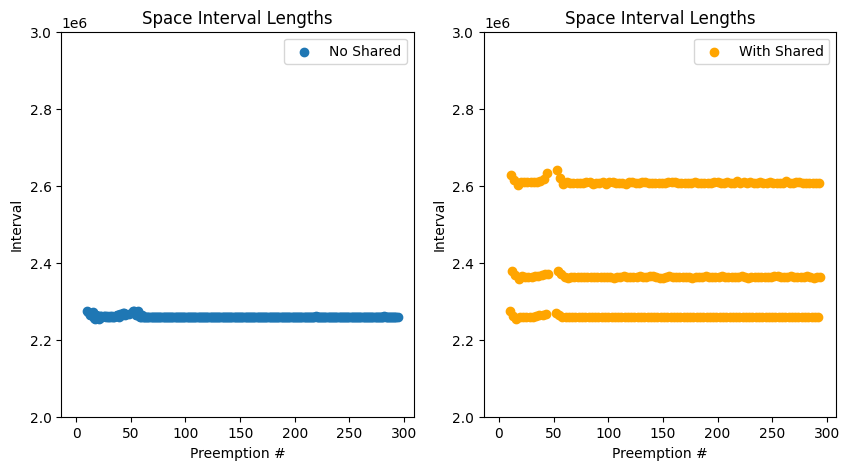

In [10]:
# Make subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a scatter plot
ax1.scatter(range(1, NUM_SAMPLES*3-5), no_shared_ivls, label='No Shared')

# Add labels and title
ax1.set_xlabel('Preemption #')
ax1.set_ylabel('Interval')
ax1.set_title('Space Interval Lengths')

# Add legend
ax1.legend()

# Second plot
ax2.scatter(range(1, NUM_SAMPLES*3-5), shared_ivls, label='With Shared', color='orange')

# Add labels and title
ax2.set_xlabel('Preemption #')
ax2.set_ylabel('Interval')
ax2.set_title('Space Interval Lengths')

# Add legend
ax2.legend()

# Set y-axis limits
ax1.set_ylim(2.0*1e6, 3*1e6)
ax2.set_ylim(2.0*1e6, 3*1e6)

# Show the plot
plt.show()

In [11]:
len(no_shared_ivls), len(shared_ivls)

(294, 294)

ValueError: x and y must be the same size

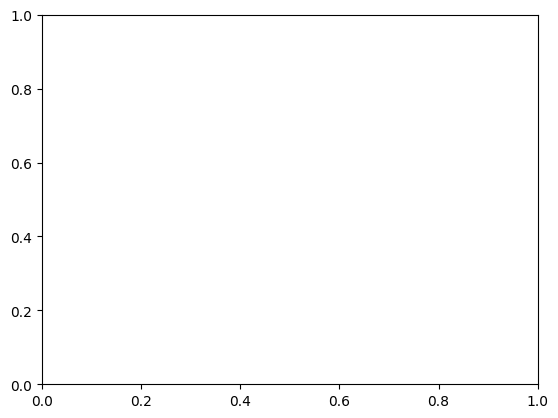

In [13]:
# Create a scatter plot
plt.scatter(range(1, NUM_SAMPLES-2), no_shared_ivls, label='No Shared 1')
plt.scatter(range(1, NUM_SAMPLES-2), shared_ivls, label='Shared 1')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval')
plt.title('Space Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
plt.ylim(2*1e6, 2.5*1e6)

# Show the plot
plt.show()